# LSTM Gates

### Question 1

In [ ]:
import numpy as np
def tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
Cprev = np.array([1.3,.6,-.5])
f = np.array([0.8,0.1,0.9])
i = np.array([0.3,0.7,0.6])
Cprime = np.array([0.6,0.1,-0.3])
o = np.array([0.2,0.1,0.7])
C = Cprev*f+ i*Cprime
h = tanh(C)*o
print(C,h)

[ 1.22  0.13 -0.63] [ 0.16793084  0.01292726 -0.39063655]


# BERT MLM for pretraining

## The attention mechanism
### Question 2

After applying self-attention once


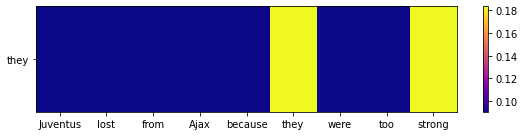

After applying self-attention twice


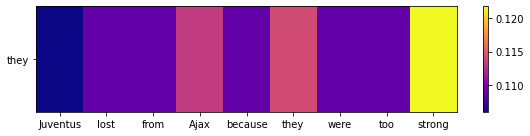

After applying self-attention once


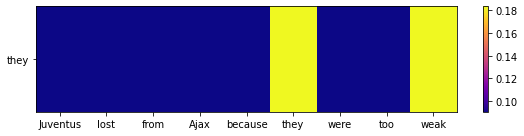

After applying self-attention twice


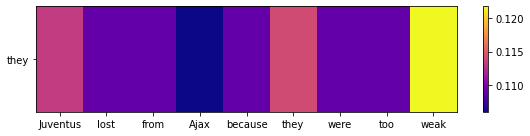

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 8,2

xaxis = np.array(range(0,9))
extent = [xaxis[0]-(xaxis[1]-xaxis[0])/2., xaxis[-1]+(xaxis[1]-xaxis[0])/2.,0,1]

s1 = "Juventus lost from Ajax because they were too strong".split(" ")
s2 = "Juventus lost from Ajax because they were too weak".split(" ")
reps1 = np.array([[1,0],[0,0],[0,0],[-1,0],[0,0],[0,1],[0,0],[0,0],[-1,1]]) # 9x2
reps2 = np.array([[1,0],[0,0],[0,0],[-1,0],[0,0],[0,1],[0,0],[0,0],[1,1]]) #9x2

Wk = np.array([[1,0],[0,1]])
Wq = np.array([[1,0],[0,1]])
Wv = np.array([[1,0],[0,1]])


from fractions import Fraction
def print_fracs(array):
  print('\r\n'.join(['\t'.join([str(Fraction(el).limit_denominator()) for el in row]) for row in array]))


def softmax(x,axis=0):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=axis)

def attend(reps):
  k = reps @ Wk # 9x2 x 2x2 = 9x2
  q = reps @ Wq # 9x2 x 2x2 = 9x2
  v = reps @ Wv # 9x2 x 2x2 = 9x2
  scaler = np.sqrt(Wq.shape[1])
  a = softmax((k @ q.transpose())/scaler)  # 9x2 x 2x9 = 9x9
  o = a @ v  # 9x9 x 9x2 = 9x2
  return a,o

def mycmap(y):
  plt.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent)
  plt.xticks(xaxis,s)
  plt.yticks([.5],['they'])
  plt.colorbar()
  plt.tight_layout()
  plt.show()


for s,reps in zip((s1,s2),(reps1,reps2)):
  a1,v1 = attend(reps)
  a2,v2 = attend(v1)
  print("After applying self-attention once")
  mycmap(a1[:,5])
  print("After applying self-attention twice")
  mycmap(a2[:,5])


## Multi-head self-attention
### Question 3
![](https://docs.google.com/drawings/d/e/2PACX-1vSFtIqh5XT-ON5Ic-oFfHk7VQh3Arvb0bxfiOUWtpm5TT-R6U0WBY8WuoN3DpTMb8qZeYqcezDwHt21/pub?w=1859&h=744)

## Pretraining, freezing and finetuning

### Question 4
We call these objectives 'self-supervised' because the ground-truth labels that need to be guessed by the pretraining objective are provided without human labelers.
For example, we can let the model mask random words in text, and have it then try to guess what is behind the mask.
The benefit is that it is much cheaper to generate input-target_label combos, and hence we will be able to generate many more than if we were to need manual labeling.

### Question 5
You can leverage the unlabeled tweets by training a model that tries to solve a self-supervised task (such as Language Modelling), and subsequently reusing part of those trained parameters when you start trainnig on the target task (sentiment classification).

### Question 6
The answer looks like the image below.
Note that this is a coarse-grained view: 'frozen' means freezing every pretrained layer, and 'finetuning' means freezing none of them. In reality, there are levels between this: you could e.g., freeze only the embedder, or the embedder and part of the encoder stack.

The advantage of freezing layers, is that it avoids 'catastrophic forgetting': when training on the target task for the first time, the gradient sizes will be quite big (because you will be quite bad at the start), possibly even so big that you forget some useful information you had stored during pretraining.

An approach taken sometimes is to freeze layers for a while, and only finetune when the target-task-specific layers haven been trained for a while.

![](https://docs.google.com/drawings/d/e/2PACX-1vQ18snkdsc4h6hgu1euNXpdbRBCMjYjjEf1H06wQ0jF1UYWWmCswqH5iksx1GxEycCaLlGj8ArRGfdx/pub?w=1441&h=645)